# Project: Investigating No Show Appointment Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset consist of information from 100k medical appoinments in Brazil and is focused on the question of whether
> or not a patients show up for their appoinment. This data set consist of several characteristics.

> Charcaterisctics are: Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap,SMS_received, No_show.

> **This Project will soleley focus only to find Characteristics of Patients who missed the appointment**

> Based on the sevral characteristics about Patients this project will try to find some characteristics of Patients who are most likely to miss the appointment. 

> My main focus is to analyze some points mentioned below:

>1. Gender: Is missing appointment associated with Gender, if Yes, then which Gender is more likely to miss it ?
>2. Age: Is number of people missing the appointment are associated with Age?
>3. Neighbourhood: Are there some neighbourhood having more number of patients who are missing the appointments ?
>4. SMS: Are people not recieving SMS as reminder are more likely to miss appountment?
>5. Disability: How miss appointment is associated with disability and disease factors such as Hipertension, Diabetes, Alcoholism, Handcap ?
>6. Scholorship:  Are patients who recived Scholorship are less likely to miss appointments?


In [229]:
# importing required packages - Pandas, Numpy, Matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# including 'magic word'
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Loading the data, checking for cleanliness, and then triming and cleaning the dataset for analysis.


In [230]:
# import No_show_appointments.csv saved as csv and verfying f data is loaded
df = pd.read_csv('No_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [231]:
# Handling No-show column name as it make more sense to make it No_show. 
#Python may also confuse that I am subtracting string from string.

df.rename(columns = {'No-show': 'No_show'},inplace= True)

# using Head chcking if all changes have been made
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Before moving ahead I want to explore the data
> 1. checking shape of data
> 2. exploring summary statistics
> 3. Checking for null Values
> 4. Checking for duplicate values
> 5. Dropping or filling null values
> 6. Dropping duplicate values
> 7. Dropping columns that are not useful
> 8. Checking for Data Type
> 9. converting datatype if rerquired
> 10. extracting/changing values if required such as of date

>no-show = **No** -> patient showed up

>no-show = **Yes** -> patient does not showed up


In [232]:
# 1. checking shape of data
df.shape

(110527, 14)

In [233]:
# 2. exploring summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [234]:
# Checking for null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [235]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [236]:
# Checking for duplicate values
sum(df.duplicated())

0

> This dataset does not have any duplicate rows or null values.

In [237]:
# checking data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_show            object
dtype: object

In [238]:
# we can drop the PatientId and AppointmentID as they are patinets specific and does not require in analysis
df.drop(["PatientId","AppointmentID"], axis =1,inplace = True)

In [239]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> In the above cell I noticed that ScheduledDay, AppointmentDay are having character in the date.
> For ScheduledDay and AppointmentDayto, while handingling data type comnversion I will change data type to **date** and make the format of **YYYY-MM-DD**, as  I do not need the time after date

In [240]:
# converting ScheduledDay and AppointmentDay data type and convert to YYYY-MM-DD.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [241]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [242]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No_show                   object
dtype: object

In [243]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> In above cell we can see that **min age is -1**, which is not possible, so checking below for the patients and deleting the record

In [244]:
df.query('Age <0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [245]:
# selecting record where Age is not negative in the dataframe
df = df.query('Age >=0')

In [246]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [247]:
#checking for unique values
df.nunique()

Gender              2
ScheduledDay      111
AppointmentDay     27
Age               103
Neighbourhood      81
Scholarship         2
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No_show             2
dtype: int64

In [248]:
# exploring unique values in selected columns
columns =['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No_show']
for col in columns:
    print(col,df[col].unique())


Gender ['F' 'M']
Scholarship [0 1]
Hipertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]
Handcap [0 1 2 3 4]
SMS_received [0 1]
No_show ['No' 'Yes']


In [249]:
columns =['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No_show']
for col in columns:
    print(col,'\n',df[col].value_counts(normalize= True),'\n')
    


Gender 
 F    0.649974
M    0.350026
Name: Gender, dtype: float64 

Scholarship 
 0    0.901734
1    0.098266
Name: Scholarship, dtype: float64 

Hipertension 
 0    0.802752
1    0.197248
Name: Hipertension, dtype: float64 

Diabetes 
 0    0.928135
1    0.071865
Name: Diabetes, dtype: float64 

Alcoholism 
 0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64 

Handcap 
 0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: Handcap, dtype: float64 

SMS_received 
 0    0.678971
1    0.321029
Name: SMS_received, dtype: float64 

No_show 
 No     0.798066
Yes    0.201934
Name: No_show, dtype: float64 



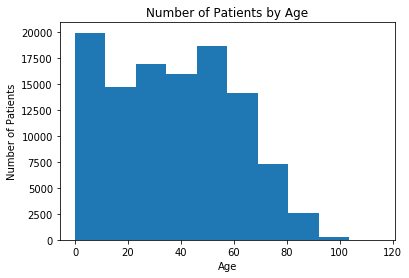

In [250]:
plt.hist(df.Age)
plt.title("Number of Patients by Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients");

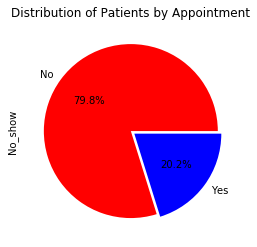

In [252]:
ax=df.No_show.value_counts(normalize=True).plot.pie(colors=['red','blue'],explode = (0,0.05),autopct='%1.1f%%');
ax.set_title("Distribution of Patients by Appointment");


In [253]:
# Creating masking fro Cancelled and not Cancelled
not_show_up = df.No_show=="Yes"
show_up = df.No_show == "No"

<a id='eda'></a>
## Exploratory Data Analysis



><ul>
><li>1 <a href="#Gender">Gender: Is missing appointment associated with Gender, if Yes, then which Gender is more likely to miss it ?</a></li> 
><li>2 <a href="#Age">Age: Is number of people missing the appointment are associated with Age?</a></li> 
><li>3 <a href="#Neighbourhood">Neighbourhood: Neighbourhood: Are there some neighbourhood having more number of patients who are missing the appointments?</a></li> 
><li>4 <a href="#SMS">SMS: Are people not recieving SMS as reminder more likely to miss appountment?</a></li>   
><li>5 <a href="#Disability">Disability: How miss appointment is associated with disability and disease factors such as Hipertension, Diabetes, Alcoholism, Handcap?</a></li>  
><li>6 <a href="#Scholorship">Scholorship: Are patients who recived Scholorship are less likely to miss appointments?</a></li> 
</ul>


**In order for better comparision, I am considering comparing pateints miss the appointment in the category to toatal numbe rof patients in that category. Ex. = no of female miss appointment/Total Number of Female in data**


<a id='Gender'></a>
### Gender: Is missing appointment associated with Gender, if Yes, then which Gender is more likely to miss it ?

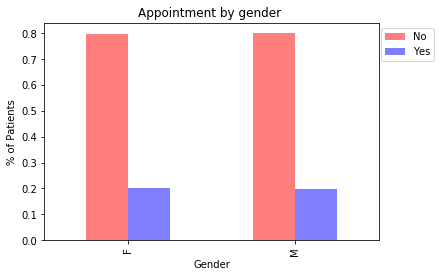

In [150]:
ax=df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar',legend=True, color=['red', 'blue'],alpha=.5)
ax.set_title("Appointment by gender ")
ax.set_xlabel("Gender")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1.18, 1));

There  is no evidence that cancellation or not cancellation is realted with Gender

<a id='Age'></a>
### Age: Is number of people missing the appointment are associated with Age??

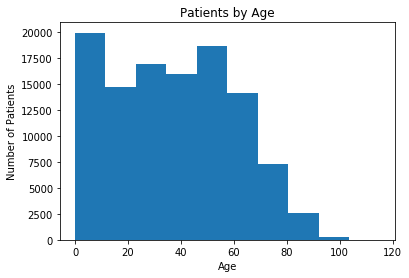

In [211]:
plt.hist(df.Age)
plt.title("Patients by Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients");

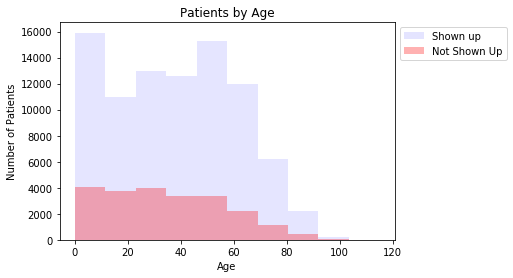

In [212]:
plt.hist(df.Age[show_up],color='blue',alpha=.1,label="Shown up")
plt.hist(df.Age[not_show_up],color='red',alpha=.3,label="Not Shown Up")
plt.title("Patients by Age")
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xlabel("Age")
plt.ylabel("Number of Patients");



In [213]:
bin_edges = [0,1,13,19,30,50,70,115]
bin_names = ["Infants","Children","Teen","Young","Adult" ,"old" ,"Senior" ] 
df['Age_Level'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [214]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_Level
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,old
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,old
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,old
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,old


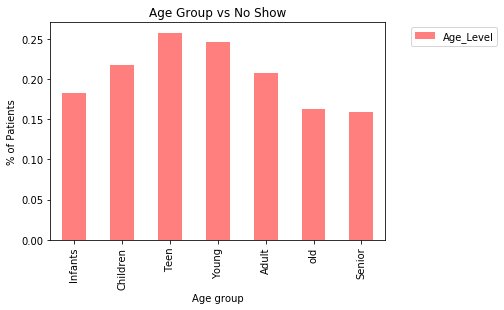

In [221]:
ax=(df.Age_Level[not_show_up].value_counts()/df.Age_Level.value_counts()).plot(kind='bar',color="red",alpha=.5)
ax.set_title("Age Group vs No Show")
ax.set_xlabel("Age group")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1.35, 1));

<a id='Neighbourhood'></a>
### Neighbourhood: Are there some neighbourhood having more number of patients who are missing the appointments?

In [51]:
df.Neighbourhood.value_counts(normalize=True)

JARDIM CAMBURI                 0.069821
MARIA ORTIZ                    0.052522
RESISTÊNCIA                    0.040090
JARDIM DA PENHA                0.035078
ITARARÉ                        0.031793
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: Neighbourhood, Length: 81, dtype: float64

In [52]:
Neigh_not_show_up = df.Neighbourhood[not_show_up].value_counts()/df.Neighbourhood.value_counts()
Neigh_not_show_up


AEROPORTO              0.125000
ANDORINHAS             0.230327
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
                         ...   
SÃO JOSÉ               0.216490
SÃO PEDRO              0.210376
TABUAZEIRO             0.182950
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Name: Neighbourhood, Length: 81, dtype: float64

In [53]:
Neigh_show_up = df.Neighbourhood[show_up].value_counts()/df.Neighbourhood.value_counts()
Neigh_show_up

AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
                         ...   
SÃO JOSÉ               0.783510
SÃO PEDRO              0.789624
TABUAZEIRO             0.817050
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Name: Neighbourhood, Length: 81, dtype: float64

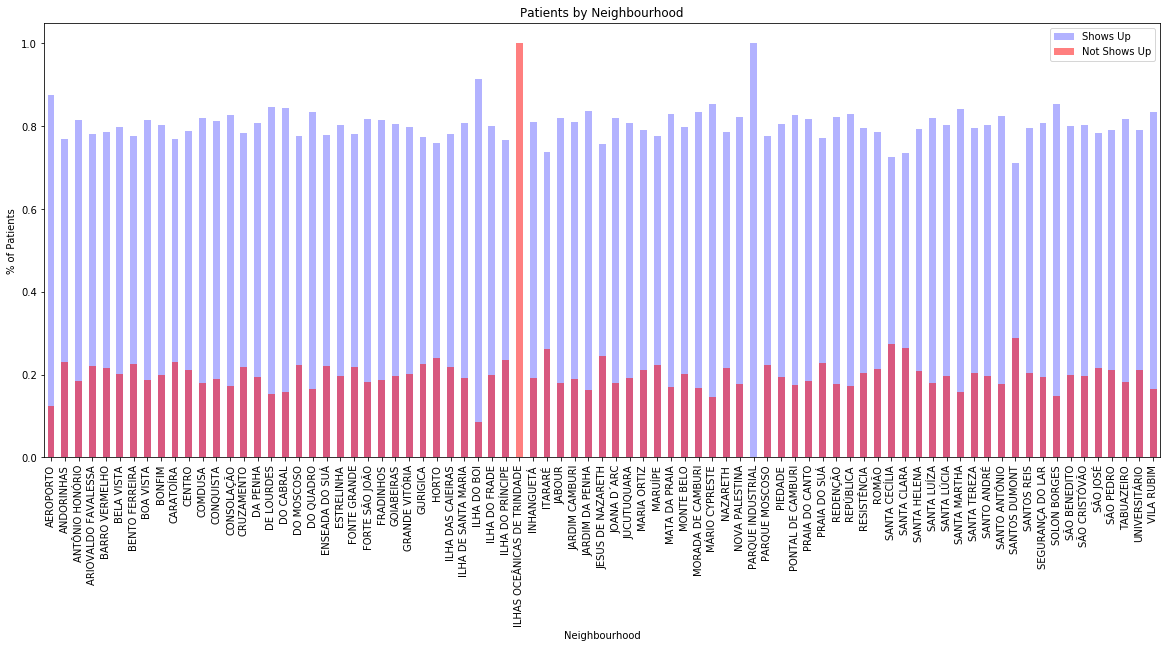

In [226]:
Neigh_show_up.plot(kind='bar', figsize=(20,8),color="blue", alpha=.3,label="Shows Up");
Neigh_not_show_up.plot(kind='bar', figsize=(20,8),color="red",alpha=.5,label="Not Shows Up")
plt.title("Patients by Neighbourhood")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Neighbourhood")
plt.ylabel("% of Patients");






<a id='SMS'></a>
### SMS: Are people not recieving SMS as reminder more likely to miss appountment?


Text(0.5, 1.0, 'A')

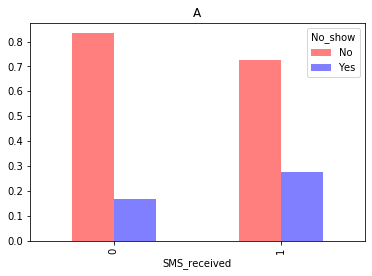

In [256]:
ax=df.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar',legend=True, color=['red', 'blue'],alpha=.5)
ax.set_title("A")

<a id='Disability'></a>
### Disability: How miss appointment is associated with disability and disease factors such as Hipertension, Diabetes, Alcoholism, Handcap?


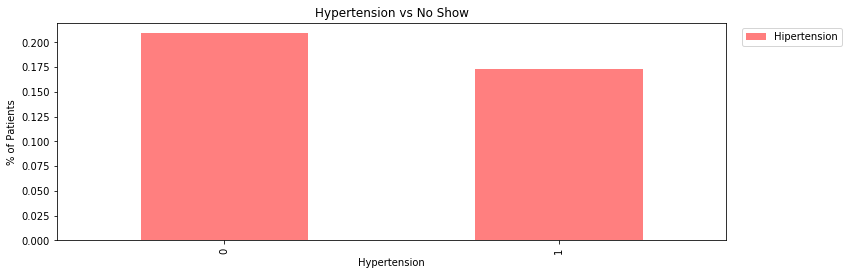

In [258]:
ax = (df.Hipertension[not_show_up].value_counts()/df.Hipertension.value_counts()).plot(kind='bar', figsize=(12,4),color="red",alpha=.5);
ax.set_title("Hypertension vs No Show")
ax.set_xlabel("Hypertension")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1.18, 1));

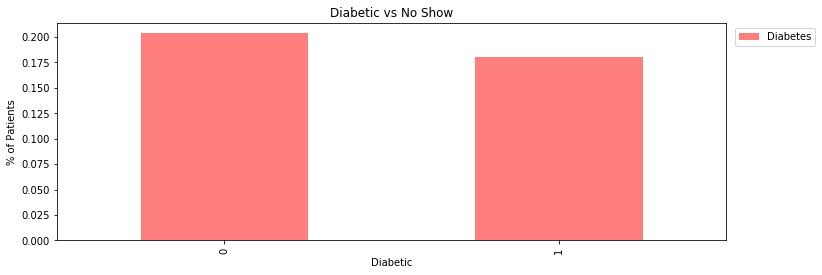

In [259]:
ax=(df.Diabetes[not_show_up].value_counts()/df.Diabetes.value_counts()).plot(kind='bar', figsize=(12,4),color="red",alpha=.5);
ax.set_title("Diabetic vs No Show")
ax.set_xlabel("Diabetic")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1.14, 1));

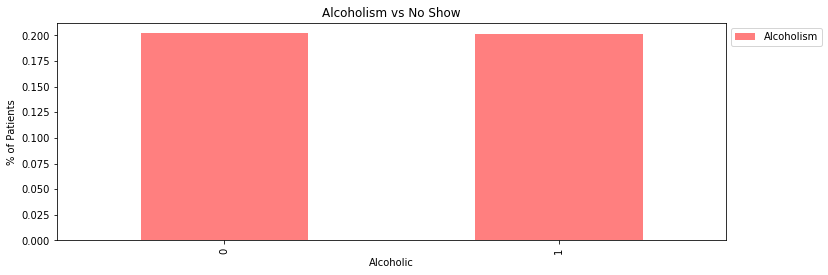

In [260]:
ax = (df.Alcoholism[not_show_up].value_counts()/df.Alcoholism.value_counts()).plot(kind='bar', figsize=(12,4),color="red",alpha=.5);
ax.set_title("Alcoholism vs No Show")
ax.set_xlabel("Alcoholic")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1, 1));

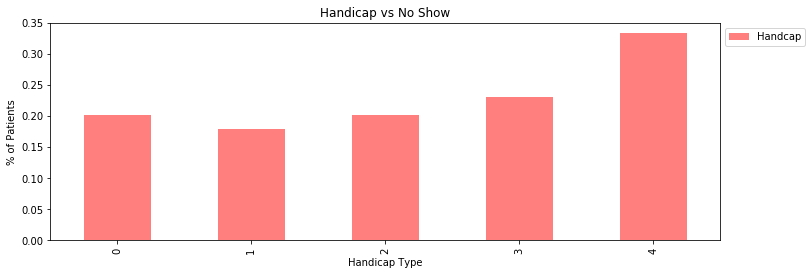

In [261]:
ax = (df.Handcap[not_show_up].value_counts()/df.Handcap.value_counts()).plot(kind='bar', figsize=(12,4),color="red",alpha=.5);
ax.set_title("Handicap vs No Show")
ax.set_xlabel("Handicap Type")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1,1));

<a id='Scholorship'></a>
### Scholorship: Are patients who recived Scholorship are less likely to miss appointments?

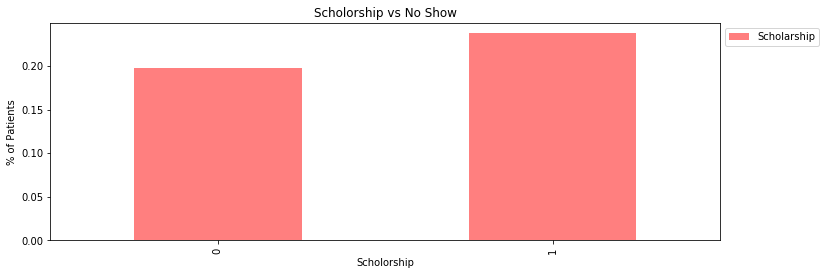

In [262]:

ax = (df.Scholarship[not_show_up].value_counts()/df.Scholarship.value_counts()).plot(kind='bar', figsize=(12,4),color="red",alpha=.5)
ax.set_title("Scholorship vs No Show")
ax.set_xlabel("Scholorship")
ax.set_ylabel("% of Patients")
ax.legend(bbox_to_anchor=(1,1));


In [263]:
df.Gender.value_counts(normalize=True)

F    0.649974
M    0.350026
Name: Gender, dtype: float64

<a id='conclusions'></a>
## Conclusions

## Limitations:

**80% of the total patients in the data shows up for the appointment while 20% does not show up.**

>1. This data has only 20% of worth of data for patients who did not shows up for the appointment. So, the data of patients who missed the appointment was not enough to come up concerete reason of Why patients would show or not show up for the appointment.
>2. No of appointments for female was 65 % while for male was noly 35%. This might be the problem to see if Gender plays an important part in missing appointmet. Although by proportion of male and female we can say that Gender does not certainly affect the missing number of appointments.
>3. Some neighbourhood have more numbe rof patients who missed the appointments. Data is lacking other features such as income, education level to analyze more from neighbourhood. Some neighbourhood are poor and do not have proper education might be missing more appointments. It would be worth see if there is any statistical significance in the rate of no shows across different regions
>4. This analysis was mainly exploratory analysis. More robust multivariate analyses would reveal causation.


## Results:
1. Female have more appointments than Male. So it might be the important factor to consider. But looking closely at data it comes out that Male and Female have almost no difference in missing appointment.
2. From Age histogram that differentiate between cancelled and not cancelled, It seems that most of the people made to the appointment. Age for people who miss appointment seems to lie between Age 0 - 10 and 20 - 30 approximately. On further dividing Age by group it seems that Teen and Young group are the one missing the appointments. Old and Senior Group shows up for appointment the most
3. As expected some of the cancellation for appointment differs by neighbourhood. Patients from "Ilhas Oceanicas De Trindadade" shows up the least, while patients in "Paque Industrial" have higher percentage of making up for appointment
4. It is interesting to note that people who recieved the SMS are the people who shows for Appointment the least.
5. People who do not have Hipertension, and diabetes shows up more for appointment than their counterparts.
6. It is agin interestng to note that Alcoholism does not have almost no effect on cancellation of Appointment
7. Handicap level 4 shows up least for appointment than other level of Handicap patients.
8. Patients enrolled in Brasilian welfare program shows up least for appointment than patients who are not enrolled.